### Naive Bayes Example: Classifying Articles in News

> HW#7 - 2022094093 Kim Dohoon

In [66]:
# Import Modules
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150

In [67]:
# Prepare Data
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [68]:
# Set Categories, and make train and test datasets
categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print("train data count: ", len(train.data))

train data count:  1789


In [69]:
### Check data
print(train.data[5]) # the features => article
print('_______________________________')
print(train.target_names[train.target[5]]) # the target_name => Label

From: jkjec@westminster.ac.uk (Shazad Barlas)
Subject: Re: Manual Shift Bigots wanted
Organization: University of Westminster
Lines: 7

The best auto-shifters on the street (AND NOT THE TRACK) are those from 
Porsche... they wont change if you floor the gas during a turn.... a few 
years back a was in a 200SX auto (you guys call it a 240SX [without turbo])
and was going round a corner.... I floored it and next thing I know I was 
pointing backwards! The other drivers seemed quite amused ;-)

						....Shaz....

_______________________________
rec.autos


In [70]:
# Define Model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

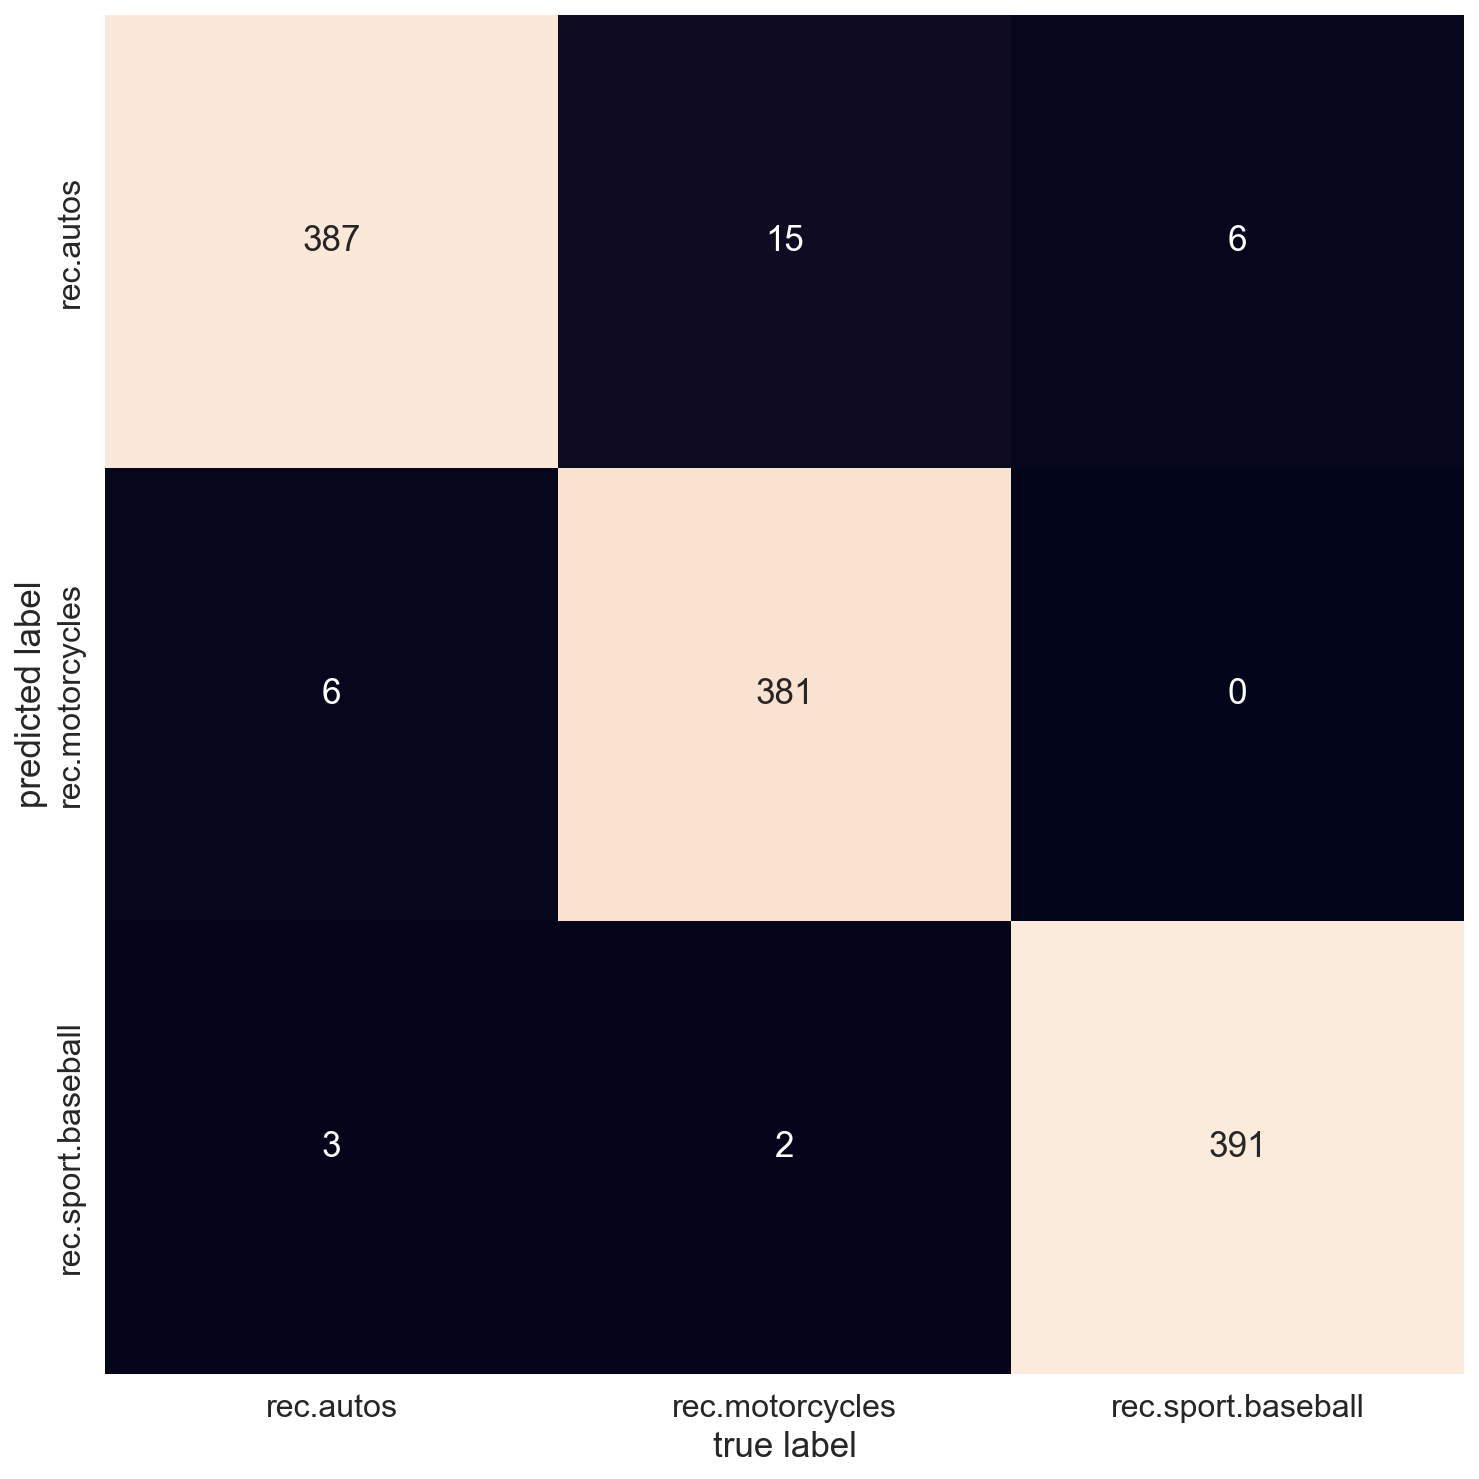

In [72]:
# Plot Result
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
# plt.savefig("confusion_matrix.jpg")

In [28]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [33]:
# CHECK !!!
predict_sentences = ['Take me out to the ball game',
                    'I want to ride my bicycle, bicycle, bicycle',
                    'Nobody going to beat my car. It is going to break the speed of sound']

for i in predict_sentences:
    pred = predict_category(i)
    print(f"____________________________________\n{i}\n -> {pred}")

____________________________________
Take me out to the ball game
 -> rec.sport.baseball
____________________________________
I want to ride my bicycle, bicycle, bicycle
 -> rec.motorcycles
____________________________________
Nobody going to beat my car. It is going to break the speed of sound
 -> rec.autos
